In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json


In [3]:
# import json

# with open('/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json') as f:
#    data = json.load(f)
# print(data)
# 
# This command happens to be error "Extra data: line 2 column 1 (char 1689)".
# The json file is not shown as the valid form.

In [4]:
# Using readlines() 
file = open('/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json', 'r') 
Lines = file.readlines() 

In [5]:
len(Lines)

1796911

In [6]:
import json 
line1_json = json.loads(Lines[0])

In [7]:
line1_json

{'id': '0704.0001',
 'submitter': 'Pavel Nadolsky',
 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
 'comments': '37 pages, 15 figures; published version',
 'journal-ref': 'Phys.Rev.D76:013009,2007',
 'doi': '10.1103/PhysRevD.76.013009',
 'report-no': 'ANL-HEP-PR-07-12',
 'categories': 'hep-ph',
 'license': None,
 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from th

In [10]:
line1_json['versions'][0]['created']

'Mon, 2 Apr 2007 19:18:42 GMT'

In [21]:
import time
if __name__ == '__main__':
    start = time.time()
    all_ = []
    for count in range(0,100000):
        current_json = json.loads(Lines[count])
        current_ = [current_json['id'], current_json['categories'], current_json['versions']]
        all_.append(current_)
    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


elapsed_time:2.3297033309936523[sec]


In [22]:
all_df = pd.DataFrame(all_, columns=["id", "categories", "versions"])

In [14]:
all_df

,id,categories,versions
0,0704.0001,hep-ph,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007..."
1,0704.0002,math.CO cs.CG,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200..."
2,0704.0003,physics.gen-ph,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007..."
3,0704.0004,math.CO,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200..."
4,0704.0005,math.CA math.FA,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007..."
...,...,...,...
9995,0706.1309,cond-mat.supr-con cond-mat.str-el,"[{'version': 'v1', 'created': 'Sat, 9 Jun 2007..."
9996,0706.1310,hep-th,"[{'version': 'v1', 'created': 'Sat, 9 Jun 2007..."
9997,0706.1311,math.AG math.RT,"[{'version': 'v1', 'created': 'Mon, 11 Jun 200..."
9998,0706.1312,math.RT,"[{'version': 'v1', 'created': 'Sat, 9 Jun 2007..."


In [23]:
import re

all_df['categories_broad'] = all_df['categories']

for ind in all_df.index:
    pos_period = re.search('\.',all_df['categories'][ind].split()[0])
    if pos_period != None:
        all_df['categories_broad'][ind] = re.match('(.*)\.',all_df['categories'][ind].split()[0])[1]
    else:
        all_df['categories_broad'][ind] = all_df['categories'][ind].split()[0]


In [24]:
all_df['categories_broad'].describe()

count     100000
unique        18
top         math
freq       20622
Name: categories_broad, dtype: object

In [25]:
all_df['created'] = all_df['versions']
for ind in all_df.index:
    all_df['created'][ind] = all_df['versions'][ind][0]['created']

In [26]:
all_df['created_year'] = all_df['created']
for ind in all_df.index:
    all_df['created_year'][ind] = re.search('[0-9]{4}',all_df['created'][ind]).group()

In [27]:
ct_2 = pd.crosstab(index=all_df['created_year'], columns=all_df['categories_broad'])

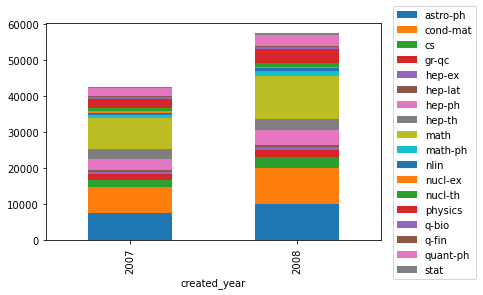

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

ct_2.plot.bar(stacked=True)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

In [21]:
df_t.to_csv('out.csv')  